In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
import joblib
from google.colab import files
import matplotlib.pyplot as plt

# Load dataset
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/dasildat/bank.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [2]:
# Duplikat
df = df.drop_duplicates()
# Label Encoding
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = df[column].astype('category')
df_encoded = pd.get_dummies(df, drop_first=True)

In [3]:
# Feature dan Label
target = 'deposit_yes'
features = df_encoded.drop(columns=[target])
# Split data
X_train, X_test, y_train, y_test = train_test_split(features,
            df_encoded[target], test_size=0.2, random_state=42)
# Feature Scalling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Define parameter range
param_grid = [
    {'C': [10, 100, 1000], 'gamma': [0.01, 0.001], 'kernel': ['rbf']}
]

# Define the HalvingGridSearchCV
classifier = HalvingGridSearchCV(SVC(), param_grid, scoring='recall', cv=5, refit=True, verbose=3)

# Fitting the model for grid search
classifier.fit(X_train_scaled, y_train)

# Print best parameter after tuning
print('Parameter terbaik:', classifier.best_params_)

# Print how our model looks after hyper-parameter tuning
print(classifier.best_estimator_)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 2976
max_resources_: 8929
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 6
n_resources: 2976
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END C=10, gamma=0.01, kernel=rbf;, score=(train=0.900, test=0.828) total time=   0.4s
[CV 2/5] END C=10, gamma=0.01, kernel=rbf;, score=(train=0.922, test=0.808) total time=   0.3s
[CV 3/5] END C=10, gamma=0.01, kernel=rbf;, score=(train=0.916, test=0.779) total time=   0.3s
[CV 4/5] END C=10, gamma=0.01, kernel=rbf;, score=(train=0.929, test=0.828) total time=   0.3s
[CV 5/5] END C=10, gamma=0.01, kernel=rbf;, score=(train=0.906, test=0.871) total time=   0.3s
[CV 1/5] END C=10, gamma=0.001, kernel=rbf;, score=(train=0.789, test=0.818) total time=   0.3s
[CV 2/5] END C=10, gamma=0.001, kernel=rbf;, score=(train=0.810, test=0.818) total time=   0.3s
[CV 3/5] END C=10, gamma=0.001, kernel=rbf;, score=(train=0.805, test=0.

In [5]:
# Save model
joblib.dump(classifier.best_estimator_, 'svm_model.joblib')

# Load the saved model
loaded_model = joblib.load('svm_model.joblib')

# Evaluate the loaded model
result_loaded = loaded_model.score(X_test_scaled, y_test)
print(f'Hasil model menggunakan model yang sudah disimpan: {result_loaded}')

Hasil model menggunakan model yang sudah disimpan: 0.8392297357814599


In [6]:
y_pred_svm = loaded_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

# Confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(conf_matrix_svm)

SVM Accuracy: 0.8392297357814599
SVM Confusion Matrix:
[[979 187]
 [172 895]]


SVM Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.84      0.85      1166
        True       0.83      0.84      0.83      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



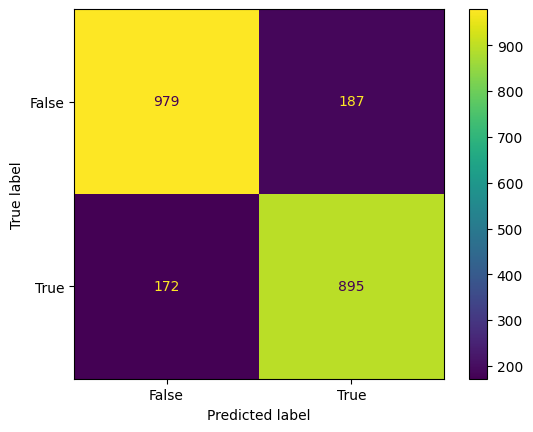

In [7]:
class_report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:")
print(class_report_svm)

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(loaded_model, X_test_scaled, y_test)
plt.show()

In [9]:
y_test_binary = y_test.astype(int)
y_pred_binary = pd.Series(y_pred_svm).astype(int)

# Create predictions dataframe
predictions_df = pd.DataFrame({
    'Actual': y_test_binary.reset_index(drop=True),
    'Predicted': y_pred_binary
})

# Save predictions to CSV
predictions_df.to_csv('predictions.csv', index=False)
print("Predictions telah disimpan ke 'predictions.csv'")

# Download the file
files.download('predictions.csv')

Predictions telah disimpan ke 'predictions.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>